In [17]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import ticker
from common import NWSL, Fonts, Images

In [2]:
# Read in the joined data
df  = pd.read_csv("2022_joined.csv")
df.head()

,name,team,minutes,Last Name,First Name,School/University,Division,Conference,Position(s) Played,Hometown,Youth Club,Citizenship,Round,Pick,Drafted By
0,Amanda Kowalski,CHI,1166.0,Kowalski,Amanda,Butler University,NCAA D1,Big East,"Midfielder, Defender","Arlington Heights, Illinois",Eclipse Select Soccer Club,United States,NaN,NaN,NaN
1,Audrey Harding,WAS,324.0,Harding,Audrey,University of North Carolina - Wilmington,NCAA D1,CAA,"Forward, Midfielder","Akron, Ohio",Ohio Premier,United States,3.0,38.0,WAS
2,Ava Cook,CHI,950.0,Cook,Ava,Michigan State University,NCAA D1,Big Ten,Forward,"Battle Creek, Michigan",Midwest United - Kalamazoo,United States,2.0,18.0,CHI
3,Belle Briede,SD,1361.0,Briede,Belle,Stanford University,NCAA D1,Pac-12,"Forward, Midfielder","Alpharetta, Georgia",Tophat Soccer Club,United States,3.0,27.0,SD
4,Chardonnay Curran,KC,368.0,Curran,Chardonnay,University of Oregon,NCAA D1,Pac-12,"Midfielder, Defender","Ewa Beach, Hawaii",Hawaii Rush,United States,2.0,17.0,KCC


In [3]:
# Calculate the total mintues played by players
total_minutes = int(df["minutes"].sum())
total_minutes

19020

In [4]:
# Create a dataframe with the minutes played for each round's selections
df_round = df.groupby(["Round"]).agg({"minutes": "sum"}).reset_index()
df_round["Round"] = df_round["Round"].astype(int)
df_round["minutes"] = df_round["minutes"].astype(int)

df_round

,Round,minutes
0,1,9318
1,2,2266
2,3,3950
3,4,2091


In [6]:
# Create a dataframe with the minutes played by all players
df_players = df[["name", "minutes", "Round"]]
df_players = df_players.sort_values("minutes", ascending=False)
df_players["Round"] = ["N/A" if np.isnan(x) else str(int(x)) for x in  df_players["Round"]]
df_players = df_players.rename(columns={"name": "Name", "minutes": "Minutes"})
df_players["Minutes"] = df_players["Minutes"].astype(int)
df_players.index = range(1, len(df_players.index)+1)

df_players

,Name,Minutes,Round
1,Savannah DeMelo,1957,1
2,Naomi Girma,1920,1
3,Jaelin Howell,1902,1
4,Diana Ordoñez,1392,1
5,Belle Briede,1361,3
6,Olivia Van der Jagt,1351,3
7,Amanda Kowalski,1166,N/A
8,Ava Cook,950,2
9,Elyse Bennett,932,1
10,Julie Doyle,690,1


In [7]:
# Group the dataframe by team and conference to prepare for the Sankey
df = df.groupby(["team", "Conference"]).agg({"minutes": "sum"}).reset_index()

# Set up colors
df["color"] = [NWSL.color(x) for x in df["team"]]

df.head()

,team,Conference,minutes,color
0,CHI,ACC,356.0,#3cb5e4
1,CHI,Big East,1166.0,#3cb5e4
2,CHI,Big Ten,1576.0,#3cb5e4
3,CHI,CAA,1.0,#3cb5e4
4,HOU,SEC,621.0,#ff6a01


In [8]:
# Set up node locations for the conferences
conf = (
    df.groupby("Conference")
    .agg({"minutes": "sum"})
    .sort_values("minutes", ascending=False)
)
conf["y"] = [
    0.05000,
    0.22,
    0.34,
    0.43,
    0.52,
    0.6,
    0.7,
    0.8,
    0.9,
    0.999000,
]
conf["x"] = 0.001
conf = conf.reset_index()
conf = conf.rename(columns={"Conference": "label"})
conf = conf[["label", "x", "y"]]
conf

,label,x,y
0,Pac-12,0.001,0.050
1,ACC,0.001,0.220
2,Big Ten,0.001,0.340
3,Big East,0.001,0.430
4,SEC,0.001,0.520
5,WCC,0.001,0.600
6,CAA,0.001,0.700
7,Big 12,0.001,0.800
8,WAC,0.001,0.900
9,Summit League,0.001,0.999


In [9]:
# Set up node locations for the NWSL teams
team = (
    df.groupby("team").agg({"minutes": "sum"}).sort_values("minutes", ascending=False)
)
team["y"] = [
    0.001000,
    0.11,
    0.21,
    0.31,
    0.39,
    0.47,
    0.546455,
    0.637364,
    0.728273,
    0.819182,
    0.910091,
    0.999000,
]
team["x"] = 0.999
team = team.reset_index()
team = team.rename(columns={"team": "label"})
team = team[["label", "x", "y"]]
team

,label,x,y
0,LOU,0.999,0.001000
1,SD,0.999,0.110000
2,CHI,0.999,0.210000
3,KC,0.999,0.310000
4,NC,0.999,0.390000
5,RGN,0.999,0.470000
6,WAS,0.999,0.546455
7,ORL,0.999,0.637364
8,LA,0.999,0.728273
9,HOU,0.999,0.819182


In [13]:
teams = list(df["team"].unique())
confs = list(df["Conference"].unique())
order = conf.append(team)
order["node_color"] = "lightgray"

In [14]:
# Plot a smaller version of the Sankey with labels
link = dict(
    source=[list(order["label"]).index(x) for x in df["Conference"]],
    target=[list(order["label"]).index(x) for x in df["team"]],
    value=df["minutes"],
    color=df["color"],
)
node = dict(
    label=order["label"],
    x=order["x"],
    y=order["y"],
    color=order["node_color"],
    thickness=5,
    line=dict(color="lightgray"),
)
data = go.Sankey(link=link, node=node)
fig = go.Figure(data)

fig.show()

In [16]:
# PLot a larger version of the Sankey without labels
link = dict(
    source=[list(order["label"]).index(x) for x in df["Conference"]],
    target=[list(order["label"]).index(x) for x in df["team"]],
    value=df["minutes"],
    color=df["color"],
)
node = dict(
    x=order["x"],
    y=order["y"],
    color=order["node_color"],
    thickness=5,
    line=dict(color="lightgray"),
)
data = go.Sankey(link=link, node=node)
fig = go.Figure(data)

fig.write_image("sankey_unlabeled.png", scale=4)

fig.show()

<Figure size 432x288 with 0 Axes>

<Figure size 28800x28800 with 0 Axes>

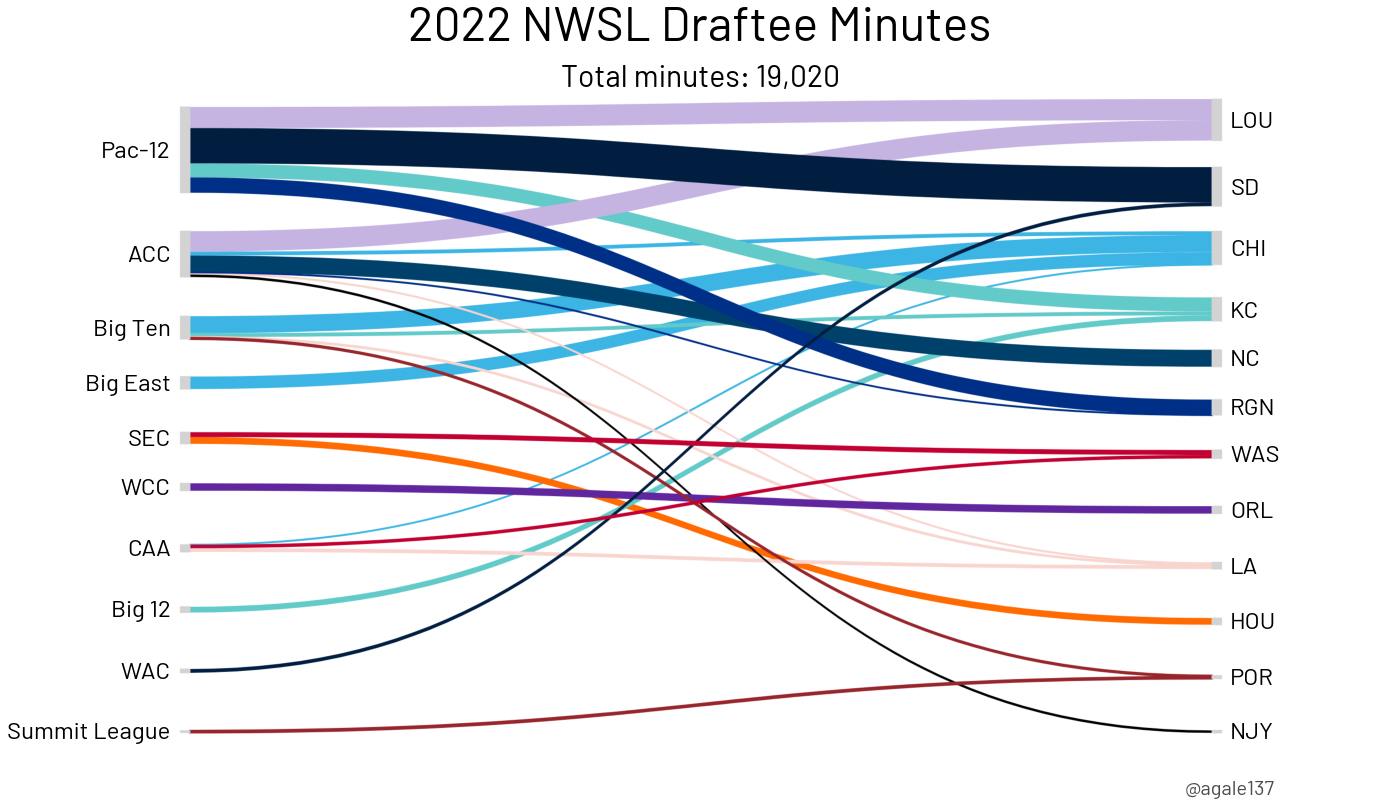

In [18]:
# Take the plain Sankey and add node labels and a title

# General plot setup
plt.clf()
plt.rcParams["figure.figsize"] = (24, 24)
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")

# Show the base sankey
img = mpimg.imread("sankey_unlabeled.png")
imgplot = ax.imshow(img)

# Render the node labels
for i, row in order.iterrows():
    x = row["x"] * 2220 + 290
    y = row["y"] * 1280 + 415
    ha = "right" if row["x"] < 0.5 else "left"
    plt.text(x, y, row["label"], ha=ha, fontproperties=Fonts.BARLOW, size=24)

# Add title
ax.set_title("2022 NWSL Draftee Minutes", fontproperties=Fonts.BARLOW, size=48)
ax.text(290+2220/2, 330, "Total minutes: 19,020", fontproperties=Fonts.BARLOW, size=30, ha="center")

# Remove axes and set bounds
ax.axis("off")
ax.set_ylim([1750, 255])

# Add username
ax.text(
    2600,
    1800,
    "@agale137",
    color="black",
    fontsize=20,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)

# Save image
plt.savefig("2022_draftee_minutes.png", bbox_inches="tight", pad_inches=0.5)

<Figure size 864x576 with 0 Axes>

<Figure size 14400x9600 with 0 Axes>

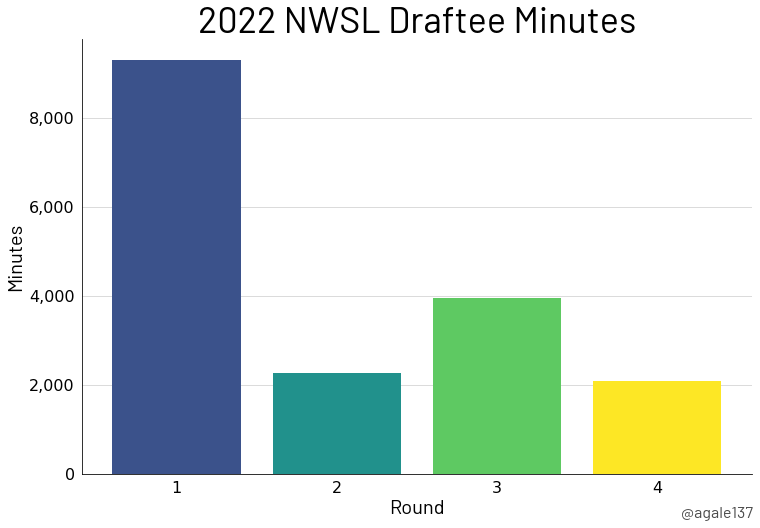

In [80]:
# Create a bar chart for minutes played by round

# General chart setup
plt.clf()
plt.rcParams["figure.figsize"] = (12, 8)
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")

# Create a colorscale for the bars
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: y / 4

# PLot the data
plt.bar(
    df_round["Round"], df_round["minutes"], color=my_cmap(rescale(df_round["Round"]))
)

# Add title
ax.set_title("2022 NWSL Draftee Minutes", fontproperties=Fonts.BARLOW, size=36)

# Axes and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color="lightgray")
ax.set_xticks([1, 2, 3, 4])
ax.set_xlabel("Round", fontproperties=Fonts.BARLOW, size=20)
ax.set_ylabel("Minutes", fontproperties=Fonts.BARLOW, size=20)
ax.tick_params(axis="both", which="major", labelsize=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Add username
ax.text(
    4.6,
    -900,
    "@agale137",
    color="black",
    fontsize=16,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)

# Save image
plt.savefig("2022_draftee_minutes_by_round.png", bbox_inches="tight", pad_inches=0.5)

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

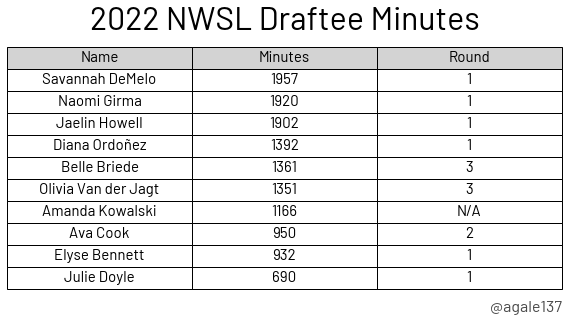

In [23]:
# Create a table with players that played the most minutes

# General setup
plt.clf()
plt.rcParams["figure.figsize"] = (8, 8)
plt.figure(facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")
fig.patch.set_visible(False)

# Hide axes
ax.axis("off")
ax.axis("tight")
ax.set_ylim([-0.03, 0.08])

# Grab the top 10 players
sub = df_players[df_players.index <= 10]

# Plot the table
table = ax.table(
    cellText=sub.values,
    colLabels=sub.columns,
    cellLoc="center",
    rowLoc="center",
    loc="center",
    colColours=np.full(len(df_players.columns), "lightgray"),
)

# Make the cells taller and set the font
table_props = table.properties()
table_cells = table_props['children']
for cell in table_cells:
    cell.set_height(0.15)
    cell.set_text_props(fontproperties=Fonts.BARLOW)
table.set_fontsize(16)

# Add title
ax.set_title("2022 NWSL Draftee Minutes", fontproperties=Fonts.BARLOW, size=32, y=1.4)

# Add username
ax.text(
    0.055,
    -0.08,
    "@agale137",
    color="black",
    fontsize=16,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)

# Save to image
fig.tight_layout()
plt.savefig("2022_draftee_minutes_top.png", bbox_inches="tight", pad_inches=0.5)